<a href="https://colab.research.google.com/github/svetaepc/ds_py/blob/master/HW_titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

titanic = pd.read_csv('/content/drive/MyDrive/train.csv')


titanic.sample(6)

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q


In [3]:
# Check for missing values
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Fill missing values for Age and Fare features with their median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)

<ipython-input-5-fee3dd6c06f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic.corr()


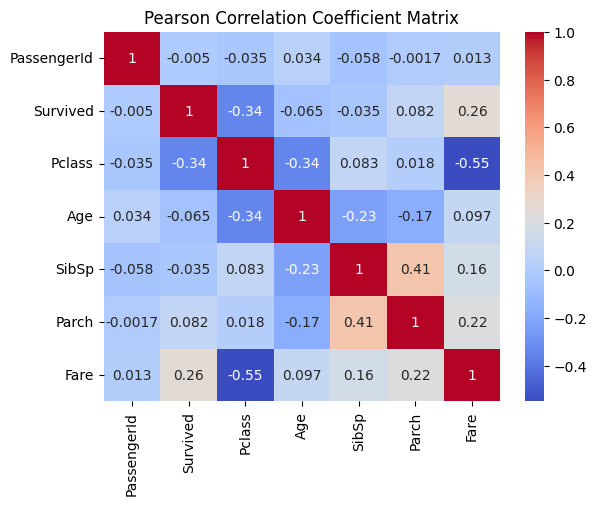

In [5]:
# Pearson correlation coefficient matrix
corr_matrix = titanic.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Coefficient Matrix')
plt.show()

In [6]:
# Create age bins and encode the Sex feature
titanic['AgeBin'] = pd.cut(titanic['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Elderly'])
titanic['Sex'] = titanic['Sex'].map({'female': 0, 'male': 1})

In [7]:
# One-hot encode the Embarked feature
titanic = pd.get_dummies(titanic, columns=['Embarked'])


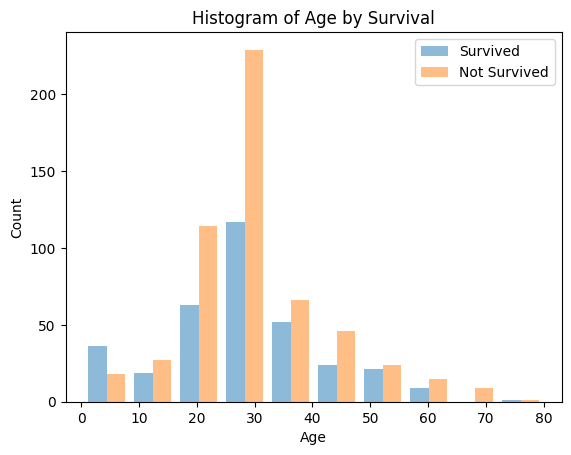

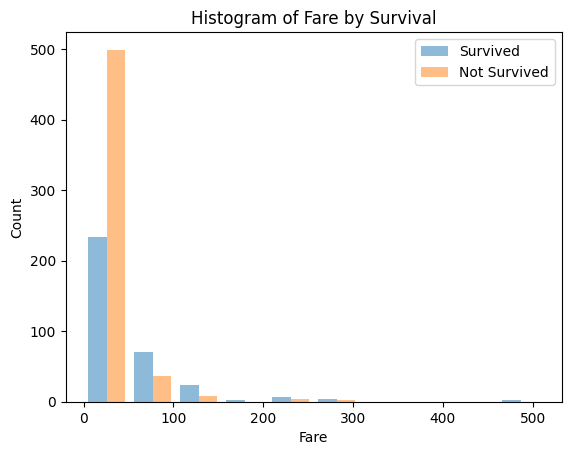

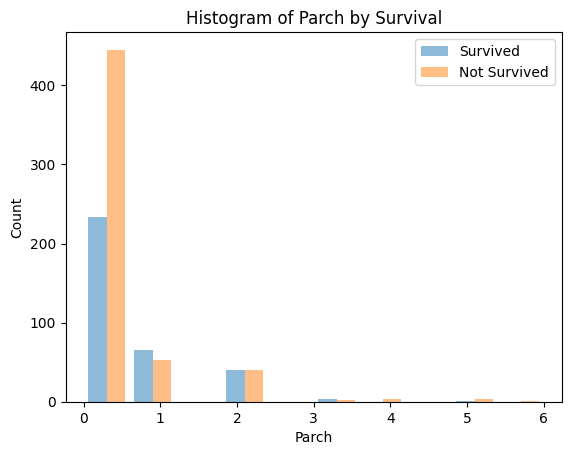

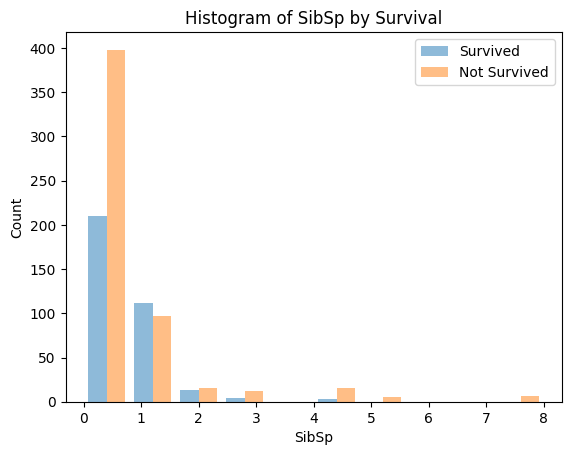

In [8]:
features = ['Age', 'Fare', 'Parch', 'SibSp']
for feature in features:
    survived = titanic[titanic['Survived'] == 1][feature]
    not_survived = titanic[titanic['Survived'] == 0][feature]
    plt.hist([survived, not_survived], bins=10, alpha=0.5, label=['Survived', 'Not Survived'])
    plt.legend(loc='upper right')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Histogram of ' + feature + ' by Survival')
    plt.show()

In [9]:
variance = titanic.var()
print(variance)

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Sex                0.228475
Age              169.512498
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
Embarked_C         0.153172
Embarked_Q         0.079040
Embarked_S         0.200593
dtype: float64


<ipython-input-9-47097b4bd376>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = titanic.var()


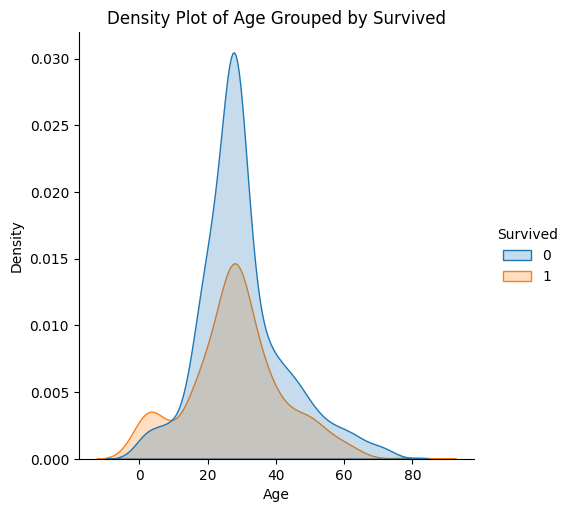

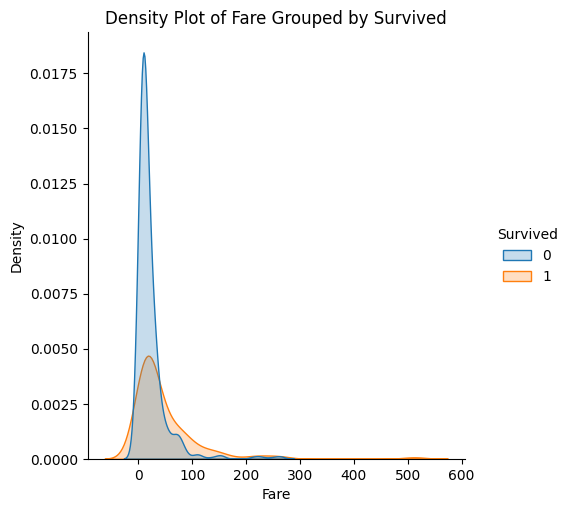

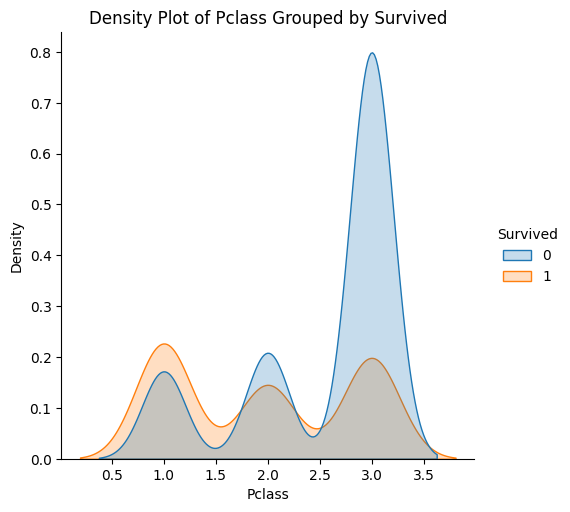

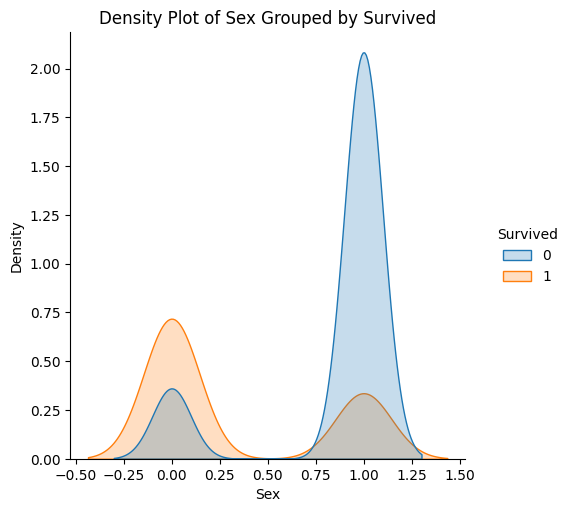

In [10]:
# Density plots of every feature grouped by class label
sns.displot(titanic, x='Age', hue='Survived', kind='kde', fill=True)
plt.title('Density Plot of Age Grouped by Survived')
plt.show()

sns.displot(titanic, x='Fare', hue='Survived', kind='kde', fill=True)
plt.title('Density Plot of Fare Grouped by Survived')
plt.show()

sns.displot(titanic, x='Pclass', hue='Survived', kind='kde', fill=True)
plt.title('Density Plot of Pclass Grouped by Survived')
plt.show()

sns.displot(titanic, x='Sex', hue='Survived', kind='kde', fill=True)
plt.title('Density Plot of Sex Grouped by Survived')
plt.show()

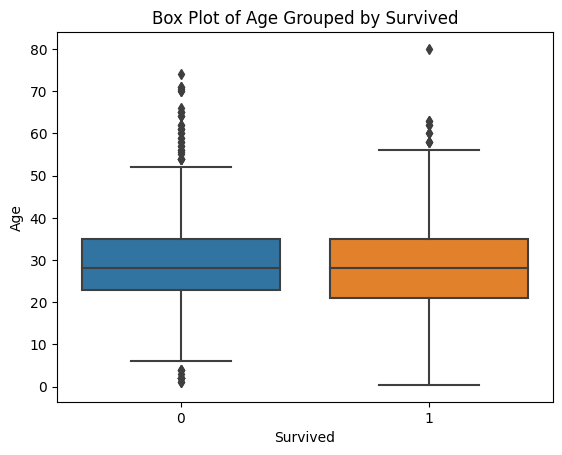

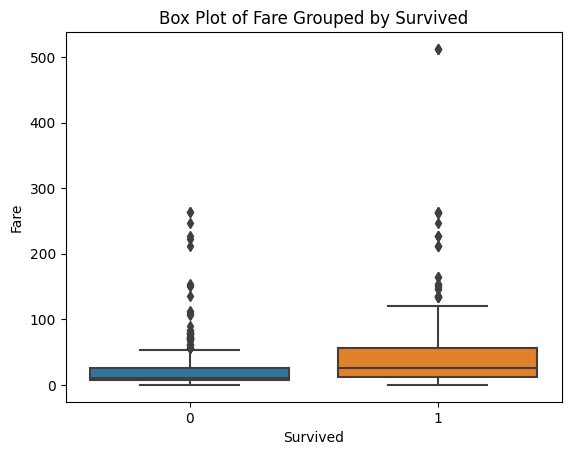

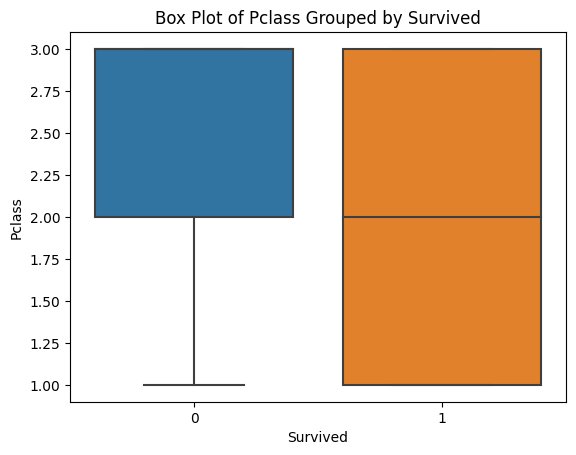

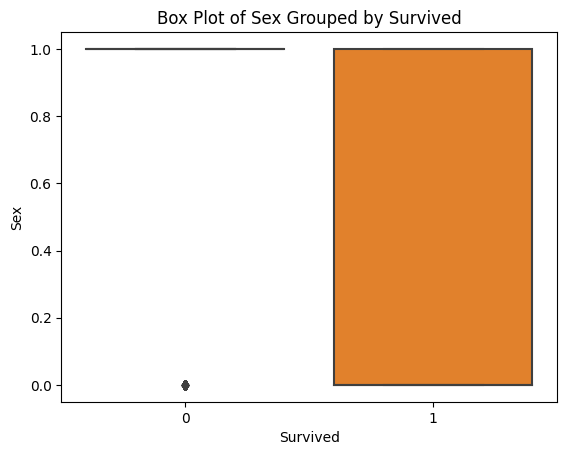

In [11]:
# Box plot for every feature
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Box Plot of Age Grouped by Survived')
plt.show()

sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.title('Box Plot of Fare Grouped by Survived')
plt.show()

sns.boxplot(x='Survived', y='Pclass', data=titanic)
plt.title('Box Plot of Pclass Grouped by Survived')
plt.show()

sns.boxplot(x='Survived', y='Sex', data=titanic)
plt.title('Box Plot of Sex Grouped by Survived')
plt.show()

In [12]:
# Select the numerical columns
X = titanic.select_dtypes(include=['float64', 'int64']).values

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Extract the target variable
y = titanic['Survived'].values



In [13]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
# Split data into features and target variable
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']
print(X.columns)
# One-hot encoding for categorical features
cat_cols = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
ohe = OneHotEncoder(sparse=False)
X_cat = ohe.fit_transform(X[cat_cols])



Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'AgeBin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
# Combine encoded categorical features with numerical features
num_cols = X.columns.difference(cat_cols)
X_num = X[num_cols]
X_encoded = pd.concat([pd.DataFrame(X_cat), X_num], axis=1)

In [15]:
# Combine encoded categorical features with numerical features
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
X_encoded = np.concatenate((X_cat, X[num_cols]), axis=1)


# Feature selection using variance
selector = VarianceThreshold(threshold=0.2)
X_variance = selector.fit_transform(X_encoded)
print(X_variance)

[[ 0.      1.     22.      1.      0.      7.25  ]
 [ 1.      0.     38.      1.      0.     71.2833]
 [ 0.      1.     26.      0.      0.      7.925 ]
 ...
 [ 0.      1.     28.      1.      2.     23.45  ]
 [ 1.      0.     26.      0.      0.     30.    ]
 [ 1.      0.     32.      0.      0.      7.75  ]]


In [16]:
# Feature forward selection
selector = SelectKBest(mutual_info_classif, k=5)
X_forward = selector.fit_transform(X_encoded, y)

# Feature extraction using PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_encoded)

In [17]:
# Information Gain (IG)
# Identify the target variable
target = "Survived"

# Identify the predictor variables
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]

# Calculate the information gain for each predictor variable
ig = mutual_info_classif(titanic[predictors], titanic[target], discrete_features=[0, 1, 5])

# Rank the predictor variables based on their information gain
ranked_predictors = sorted(zip(ig, predictors), reverse=True)
for ig, predictor in ranked_predictors:
    print(f"{predictor}: {ig:.3f}")

Fare: 0.303
Sex: 0.151
Pclass: 0.058
Age: 0.015
SibSp: 0.000
Parch: 0.000


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [19]:
#Logistic Regression without feature selection
# Import necessary libraries
import numpy as np
import pandas as pd

# Load the Titanic dataset

data = pd.read_csv('/content/drive/MyDrive/train.csv')

# Preprocess the data
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1) # Drop irrelevant features
data = data.dropna() # Drop rows with missing values
data = pd.get_dummies(data, columns=['Sex', 'Embarked']) # One-hot encode categorical features
data['Age'] = (data['Age'] - data['Age'].mean()) / data['Age'].std() # Standardize numerical features
# Split the data into training and testing sets
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)

# Define logistic regression class
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # Initialize weights to zeros
        self.theta = np.zeros(X.shape[1])
        
        # Update weights using gradient descent
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

# Train logistic regression classifier
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Evaluate classifier on test data
X_test = test_data.drop('Survived', axis=1)
y_test = test_data['Survived']
y_pred = classifier.predict(X_test, threshold=0.5)

from sklearn.metrics import precision_recall_fscore_support

# compute precision, recall, and F1-score
precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# print results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1score))
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


<ipython-input-19-b72723450cc7>:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Precision: 0.44
Recall: 0.95
F1-score: 0.60
Accuracy: 0.48


In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Load the Titanic dataset
data = pd.read_csv('/content/drive/MyDrive/train.csv')

# Preprocess the data
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1) # Drop irrelevant features
data = data.dropna() # Drop rows with missing values
data = pd.get_dummies(data, columns=['Sex', 'Embarked']) # One-hot encode categorical features
data['Age'] = (data['Age'] - data['Age'].mean()) / data['Age'].std() # Standardize numerical features

# Split the data into training and testing sets
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)

# Define logistic regression classifier
lr_classifier = LogisticRegression()

# Define RFE feature selector
rfe_selector = RFE(estimator=lr_classifier, n_features_to_select=5, step=1)

# Train feature selector on training data
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
rfe_selector.fit(X_train, y_train)

# Get selected features from feature selector
selected_features = X_train.columns[rfe_selector.support_]

# Train logistic regression classifier on selected features
X_train_selected = X_train[selected_features]
lr_classifier.fit(X_train_selected, y_train)

# Evaluate classifier on test data
X_test = test_data.drop('Survived', axis=1)[selected_features]
y_test = test_data['Survived']
y_pred = lr_classifier.predict(X_test)

# Compute precision, recall, F1-score, and accuracy
precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Selected Features: {selected_features}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1score:.2f}")
print(f"Accuracy: {accuracy:.2f}")


Selected Features: Index(['Pclass', 'Age', 'Sex_female', 'Sex_male', 'Embarked_C'], dtype='object')
Precision: 0.73
Recall: 0.64
F1-score: 0.68
Accuracy: 0.75


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che